Aqui vamos, brevemente, conhecer o trabalho de um cientista de dados. Bem, na verdade, não o trabalho inteiro. De fato, uma parte muito importante e geralmente a mais dificil é coletar e organizar os dados. Aqui, no vamos usar um conjunto de dados já prontos. 

Outro ponto é que, ao longo desse projeto vamos utilizar algumas ferramentas que para as conhecer melhor temos que se aprofundar no assunto, que não é o objetivo desse curso. Aí, os interessados podem participar em um curso de ciencia de dados. Espero que vamos oferecer esse curso como um curso de extensão na FAT apos da pandemia. 

O projeto é sobre analise de dados sobre o mercado imobiliaro do distrito King na cidade Seatle nos EUA. Esse conjunto de dados tem informações de casas vendidas na cidade tais como, o numero de quartos, a metragem, a tranquilidade da região e o preço da casa. Tendo essas informações, vamos conhecer melhor a relação entre as caracteristicas das casas e o preço. Depois montamos um modelo para determinar o preço de uma casa qualquer na cidade, baseado nos dados disponiveis. No final, fazemos Deploy do modelo em um website. 

Falando isso tudo, vamos começar a nossa jornada. Primeiro vamos instalar os pacotes que vamos precisar ao longo do projeto.
- scikit-learn
- plotly
- pandas
- pandas-profiling
- streamlit

A celula abaixo é necessario se for executar no Google Colab

In [1]:
"""from google.colab import drive
drive.mount('/content/drive')"""

ModuleNotFoundError: No module named 'google.colab'

In [2]:
#!pip install plotly=='4.8.1'

     |████████████████████████████████| 11.5 MB 2.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.8.2
    Uninstalling plotly-4.8.2:
      Successfully uninstalled plotly-4.8.2


In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Verificando a versão das bibliotecas `pandas` e `plotly`. Para poder usar `plotly` como backend dos graficos do `pandas` parecisamos 
- pandas > 1.0.4
- plotly > 4.8

In [4]:
pd.__version__

'1.0.5'

Plotly>4.8 e Pandas>1.0

In [5]:
#pd.options.plotting.backend = "plotly"

O dataset é disponivel no [House sell in King County](https://www.kaggle.com/harlfoxem/housesalesprediction). Para mais informações sobre cada features do dataset olhem no [King county houses prices prediction models](https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices)

# Pre-processamento

In [6]:
#king = pd.read_csv("./data/kc_house_data.csv")
#king = pd.read_csv('/content/drive/My Drive/UERJ/Python Course/python_online_2020/data/kc_house_data.csv')
king = pd.read_csv("https://raw.githubusercontent.com/vnikoofard/python_online_2020/master/data/kc_house_data.csv")

In [7]:
king.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [8]:
king.shape

(21613, 21)

In [9]:
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
king.isnull().values.any()

False

Olhando para os features do dataset

In [11]:
king.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Um feature (coluna, variavel) que provavelmente é importante no preço de uma casa é a sua idade. No dataset acima não temos essa variavel mas é facil de calcular a partir da data de venda do imovel a o ano da construção.

In [12]:
king.date = pd.to_datetime(king.date, infer_datetime_format=True)
king.yr_built = pd.to_datetime(king.yr_built,format='%Y')

In [13]:
king['age'] = king.date.dt.year - king.yr_built.dt.year

In [14]:
king.age = pd.to_numeric(king.age) # transformando um objeto tipo datetime a um numero

Verificando se a transformação acima deu certo!

In [15]:
king.age.iloc[0]

59

In [16]:
king.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [17]:
king[king.yr_renovated == 0]['id'].count()
#king[king.yr_renovated == 0].shape[0]

20699

Parece que não vale a pena considerar, na analise inicial, a data de renovação dos imoveis sabendo que a maioria não foi reformada. Para aperfeiçoar o modelo seria interessante voltar e incluir essa informação. Por exemplo, definir a idade de um imovel a partir da renovação em vez de construção.

Vamos excluir as colunas que não são relevantes para analise exploratoria.

In [103]:
df = king.drop(['id', 'date', 'zipcode', 'yr_renovated', 'yr_built'], axis=1)

In [19]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement      lat     long  \
0     0          3      7        1180              0  47.5112 -122.257   
1     0          3      7        2170            400  47.7210 -122.319   
2     0          3      6         770              0  47.7379 -122.233   
3     0          5      7        1050            910  47.5208 -122.393   
4     0          3      8        1680              0  47.6168 -122.045   

   sqft_living15  sqft_lot15  age  
0           1340        5650   59  
1           1690        7639   63  
2           2720        8062   82  
3           1360        5000   49  
4           1800        7503   28

In [20]:
#df.to_csv('./data/king.csv')

In [21]:
px.scatter_mapbox(data_frame=df, lat=df.lat, lon=df.long, color=df.price, mapbox_style='open-street-map')

# Analise Exploratoria

O pacote `pandas_profiling` nos fornece uma analise bem detalhada do dataset. Realmente facilita muito a vida!

Instalando o pandas profiling

pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [22]:
from pandas_profiling import ProfileReport

In [23]:
#pd.options.plotting.backend = 'matplotlib'

In [24]:
#profile = ProfileReport(df, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [25]:
#profile

In [26]:
#profile.to_file(output_file="./data/Relatorio01.html")

Agora vamos plotar alguns graficos para ter uma ideia melhor de correlações entre os features, mas antes disso vamos olhar para essa correlação numericamente

In [27]:
correlation = df.corr()
correlation

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.029244   0.087175     0.183286  0.718557 -0.011269   
age           -0.053951 -0.154324  -0.506407    -0.318488 -0.052990 -0.489640   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   
age              0.026093  0.053458   0.360665 -0.447415   -0.424248   

               sqft_basement       lat      long  sqft_living15  sqft_lot15  \
price               0.323816  0.307003  0.021626       0.585379    0.082447   
bedrooms            0.303093 -0.008931  0.129473       0.391638    0.029244   
bathrooms           0.283770  0.024573  0.223042       0.568634    0.087175   
sqft_living         0.435043  0.052529  0.240223       0.756420    0.183286   
sqft_lot            0.015286 -0.085683  0.229521       0.144608    0.718557   
floors             -0.245705  0.049614  0.125419       0.279885   -0.011269   
waterfront          0.080588 -0.014274 -0.041910       0.086463    0.030703   
view                0.276947  0.006157 -0.078400       0.280439    0.072575   
condition           0.174105 -0.014941 -0.106500      -0.092824   -0.003406   
grade               0.168392  0.114084  0.198372       0.713202    0.119248   
sqft_above         -0.051943 -0.000816  0.343803       0.731870    0.194050   
sqft_basement       1.000000  0.110538 -0.144765       0.200355    0.017276   
lat                 0.110538  1.000000 -0.135512       0.048858   -0.086419   
long               -0.144765 -0.135512  1.000000       0.334605    0.254451   
sqft_living15       0.200355  0.048858  0.334605       1.000000    0.183192  

Usando o método heatmap do seaborn

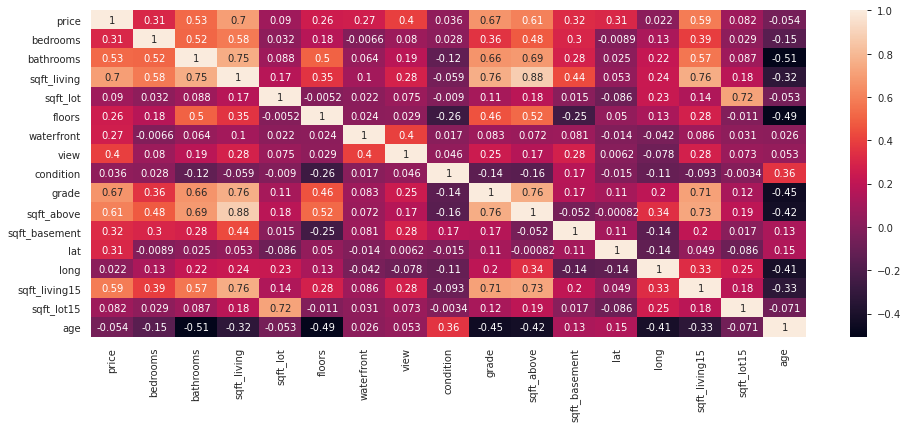

In [28]:
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlation, annot=True)
plt.show()

Bem, aqui vamos separar os features que tem correlação acima de 0.5 com o preço. 

In [91]:
cols = correlation['price'][(abs(correlation['price']>0.3))]

In [92]:
cols

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
view             0.397293
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
lat              0.307003
sqft_living15    0.585379
Name: price, dtype: float64

In [93]:
l = cols.index.to_list()

In [94]:
l

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15']

In [95]:
important = df[l]

In [96]:
important

price  bedrooms  bathrooms  sqft_living  view  grade  sqft_above  \
0      221900.0         3       1.00         1180     0      7        1180   
1      538000.0         3       2.25         2570     0      7        2170   
2      180000.0         2       1.00          770     0      6         770   
3      604000.0         4       3.00         1960     0      7        1050   
4      510000.0         3       2.00         1680     0      8        1680   
...         ...       ...        ...          ...   ...    ...         ...   
21608  360000.0         3       2.50         1530     0      8        1530   
21609  400000.0         4       2.50         2310     0      8        2310   
21610  402101.0         2       0.75         1020     0      7        1020   
21611  400000.0         3       2.50         1600     0      8        1600   
21612  325000.0         2       0.75         1020     0      7        1020   

       sqft_basement      lat  sqft_living15  
0                  0  47.5112           1340  
1                400  47.7210           1690  
2                  0  47.7379           2720  
3                910  47.5208           1360  
4                  0  47.6168           1800  
...              ...      ...            ...  
21608              0  47.6993           1530  
21609              0  47.5107           1830  
21610              0  47.5944           1020  
21611              0  47.5345           1410  
21612              0  47.5941           1020  

[21216 rows x 10 columns]

Coeficiente de Pearson
*   Valor entre -1 e 1 - distribuição simétrica.
*   Valor maior que 1 - distribuição assimétrica positiva.
*   Valor maior que -1 - distribuição assimétrica negativa.

In [35]:
df.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
age               0.469162
dtype: float64

In [36]:
important.skew()

bedrooms         1.974300
bathrooms        0.511108
sqft_living      1.471555
view             3.395750
grade            0.771103
sqft_above       1.446664
sqft_basement    1.577965
lat             -0.485270
sqft_living15    1.108181
dtype: float64

In [37]:
pd.options.plotting.backend = 'plotly'

## price

Vamos dar uma olhada na distribuição da variavel "price". 

In [38]:
df.price.plot(kind = 'hist')

In [39]:
px.box(df.price)

Como é visivel no grafico (e a gente já sabia via `skew()`) essa variavel não tem uma distribuição normal. Esse não é recomendado para muitos algoritmos de machine learning. Seria legal se não tivesse essa calda longa. Por exemplo, se a gente pudesse cortar valores acima de 1,300,000

In [40]:
df[df.price<1300000]['price'].skew()

0.980195709750986

In [41]:
df[df.price>1500000].shape

(516, 17)

In [42]:
df[df.price<1500000]['price'].plot.hist()

Porem não podemos alterar a variavel "price". Essa variavel é a variavel *target*. Isso significa que nos queremos construir modelos para calcular essa variavel via outras variaveis do dataset. Ou seja, "price" é uma variavel dependente! **Não é recomendado ajustar a variavel target!**

## sqft_living

Agora vamos olhar para a variavel independente "sqft_living" que tem uma correlação forte com a variavel dependente.

In [43]:
df.sqft_living.skew()

1.471555426802092

In [44]:
df.sqft_living.plot(kind = 'hist')

In [45]:
px.box(df.sqft_living)

Essa variavel tabmem não está seguindo a distribuição normal e tem uma calda longa devio os outliers (anomalias). Talvez possamos cortar os outliers, mas temos que ter certeza que são poucos!No grafico Box, o "upper fence" é 4230. vamos ver cortando os valores acima disso o que acontece.

In [46]:
df[df.sqft_living<4230].sqft_living.plot(kind = 'hist')

In [47]:
df[df.sqft_living<4230].sqft_living.skew()

0.5843533224423929

In [48]:
df[df.sqft_living<4230].shape

(21030, 17)

In [49]:
df[df.sqft_living<5230].sqft_living.skew()

0.8352506818730697

In [50]:
df[df.sqft_living<5230].shape

(21444, 17)

In [51]:
df.shape

(21613, 17)

Conclusão, para não perder muitos dados e ainda conseguir consertar a normalidade da distribuição vamos cortar os valores acima de 5230 da variaves "sqft_living"

In [97]:
#df = df[df.sqft_living<5230]
important = important[important.sqft_living<5230]

In [53]:
df.skew()

price             2.682014
bedrooms          2.009317
bathrooms         0.284230
sqft_living       0.835251
sqft_lot         13.430306
floors            0.627820
waterfront       11.995987
view              3.469721
condition         1.029735
grade             0.673793
sqft_above        1.099530
sqft_basement     1.408323
lat              -0.482126
long              0.891184
sqft_living15     1.024246
sqft_lot15        7.888098
age               0.462205
dtype: float64

In [54]:
important.skew()

bedrooms         2.009317
bathrooms        0.284230
sqft_living      0.835251
view             3.469721
grade            0.673793
sqft_above       1.099530
sqft_basement    1.408323
lat             -0.482126
sqft_living15    1.024246
dtype: float64

## bedrooms

Agora vamos dar uma olhada na variavel "bedrooms" que aparentemente não é normal!

In [55]:
df.bedrooms.plot(kind = 'hist')

Vixi! Tem um imovel com 33 quartos e isso está bagunçando tudo!

In [56]:
px.box(df.bedrooms)

Vamos cortar esse imovel que tem 33 quartos para ver se a distribuição melhore

In [57]:
df[df.bedrooms<11].sqft_living.skew()

0.835327682164084

In [98]:
#df = df[df.bedrooms<11]
important = important[important.bedrooms<11]

In [59]:
important.skew()

bedrooms         0.474798
bathrooms        0.284276
sqft_living      0.835328
view             3.469521
grade            0.673652
sqft_above       1.099594
sqft_basement    1.408526
lat             -0.482044
sqft_living15    1.024132
dtype: float64

Otimo! As distrubuições estão bem melhor! 

## sqft_basement

Agora é a vez da variavel "sqft_basement"

In [60]:
df.sqft_basement.plot(kind = 'hist')

Oops! Aparentemente a maioria dos imoveis não tem basement (andar em baixo).

In [61]:
df.sqft_basement[df.sqft_basement>0].plot(kind = 'hist')

In [62]:
px.box(df.sqft_basement[df.sqft_basement>0])

In [63]:
df.sqft_basement[df.sqft_basement>0].shape

(8357,)

In [64]:
df.sqft_basement[df.sqft_basement>1740].shape

(119,)

In [65]:
df.sqft_basement[df.sqft_basement<1740].skew()

1.2906319340440966

Bem, se a gente excluir os imoveis que tem basement maior do que 1740 não perderemos muitos dados mas conseguimos melhorar a distribução um pouco. 

In [99]:
#df = df[df.sqft_basement<1740].copy()
important = important[important.sqft_basement<1740].copy()

In [67]:
important.shape

(21321, 9)

In [68]:
important.skew()

bedrooms         0.442761
bathrooms        0.271853
sqft_living      0.815348
view             3.531590
grade            0.669785
sqft_above       1.108419
sqft_basement    1.290632
lat             -0.479876
sqft_living15    1.028846
dtype: float64

In [69]:
df.skew()

price             2.630365
bedrooms          0.442761
bathrooms         0.271853
sqft_living       0.815348
sqft_lot         13.551793
floors            0.622690
waterfront       12.309664
view              3.531590
condition         1.032871
grade             0.669785
sqft_above        1.108419
sqft_basement     1.290632
lat              -0.479876
long              0.892496
sqft_living15     1.028846
sqft_lot15        7.874298
age               0.461240
dtype: float64

## sqft_above

Analisando a variavel "sqft_above"

In [70]:
df.sqft_above.plot(kind = 'hist')

In [71]:
px.box(df.sqft_above)

De novo, uma calda longa!

In [72]:
df[df.sqft_above<4400].sqft_above.skew()

0.992654180540234

In [73]:
df[df.sqft_above<4400].sqft_above.shape

(21216,)

In [74]:
df.shape

(21321, 17)

Se excluimos as casas com andar superior acima de 4400 não perderemos muita coisa!

In [100]:
#df = df[df.sqft_above<4400].copy()
important = important[important.sqft_above<4400].copy()

In [76]:
important.skew()

bedrooms         0.448777
bathrooms        0.236805
sqft_living      0.746301
view             3.551719
grade            0.604304
sqft_above       0.992654
sqft_basement    1.283588
lat             -0.475973
sqft_living15    0.969750
dtype: float64

## view

Agora é a vez da variavel "view" que é uma variavel discreta! 

In [77]:
df.view.plot(kind = 'hist')

In [78]:
px.box(df.view)

In [79]:
df[df['view']>3].shape

(258, 17)

In [80]:
df.view.describe()

count    21216.000000
mean         0.214367
std          0.728565
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [81]:
df.view.value_counts()

0    19274
2      904
3      464
1      316
4      258
Name: view, dtype: int64

Aparentemente a maioria das casa ou não tem uma visão boa ou esse features não foi preenchido adequadamente. Mesmo não tendo uma boa distribução vamos continuar com essa variavel intacta.

In [82]:
important.skew()

bedrooms         0.448777
bathrooms        0.236805
sqft_living      0.746301
view             3.551719
grade            0.604304
sqft_above       0.992654
sqft_basement    1.283588
lat             -0.475973
sqft_living15    0.969750
dtype: float64

# Machine Learning

Nessa seção vamos aplicar alguns algoritmos de Machine Learning para construir um modelo que preve o valor de um imovel baseado em suas características.

In [83]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement      lat     long  \
0     0          3      7        1180              0  47.5112 -122.257   
1     0          3      7        2170            400  47.7210 -122.319   
2     0          3      6         770              0  47.7379 -122.233   
3     0          5      7        1050            910  47.5208 -122.393   
4     0          3      8        1680              0  47.6168 -122.045   

   sqft_living15  sqft_lot15  age  
0           1340        5650   59  
1           1690        7639   63  
2           2720        8062   82  
3           1360        5000   49  
4           1800        7503   28

In [84]:
important.head()

bedrooms  bathrooms  sqft_living  view  grade  sqft_above  sqft_basement  \
0         3       1.00         1180     0      7        1180              0   
1         3       2.25         2570     0      7        2170            400   
2         2       1.00          770     0      6         770              0   
3         4       3.00         1960     0      7        1050            910   
4         3       2.00         1680     0      8        1680              0   

       lat  sqft_living15  
0  47.5112           1340  
1  47.7210           1690  
2  47.7379           2720  
3  47.5208           1360  
4  47.6168           1800

Agora temos duas escolhas, usar a tabela "important" ou o dataset curado. De qualquer forma temos que separar a coluna "price" dos dataset. Essa coluna é a variavel alvo.

In [106]:
X = important.drop('price', axis = 1)
y = important['price']
#X = df[df.index.isin(important.index)].drop(['price'], axis=1)
#y = df['price']

In [107]:
X.shape

(21216, 9)

In [108]:
y.shape

(21216,)

Olhando para a dataset vimos que os numeros em cada coluna tem uma grandeza independente das outras. Muitos algoritmos de machine learning são sensiveis em relação das grandezas de numeros. Por exemplo, a coluna "sqft_living" tem numeros na escala de 1000-10000 mas os numeros da "bathroom" são da escala 1-10. Isso faz que a coluna "sqft_living" seja 1000 vezes mais importante do que a coluna "bathroom", independente da correlação dessas duas colunas com a variavel alvo.
Por isso é recomendo que a variaveis sejam na mesma ordem, com o valor medio igual zero. Tem varias formas de colocar os numeros em um formato "Standard" ou "Normal".

In [109]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar = StandardScaler()
#scalar = MinMaxScalar()
scalar.fit(X)
X_scaled = scalar.transform(X)

In [110]:
X_scaled.shape

(21216, 9)

In [111]:
X_scaled.max()

7.472213952830212

In [112]:
X_scaled.min()

-5.956510461162213

In [113]:
X_scaled.mean()

3.1436782678174366e-15

Muitas vezes, especialmente nas redes neurais, é recomendado normalizar o dataset.

In [ ]:
def norm(x):
  return (x - x.mean(axis = 0))/x.std(axis=0)

Até agora temos dois grupo de dados, variaveis independente (X) e a variavel alvo (y). Agora vamos dividir esses dois grupos em duas partes. Uma parte para treinar os algoritmos e uma parte menor para testar se os modelos construidos estão funcionando bem. 

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [94]:
y_train.shape

(16972,)

## Regressão Linear

A regressão linear é a forma mais facil de modelar um sistema usando um conjunto de dados. Para mais informação [Regressão Linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear) 


 <img src="./image/linear.png" alt="Drawing" style="width: 600px;"/>


In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
y_pred=lr.predict(X_test)

Calculamos a precisão do nosso modelo

In [97]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [98]:
rmse

185817.64127795477

In [99]:
from sklearn.metrics import r2_score

print('R-squared (testing) ', round(r2_score(y_test,y_pred), 3))

R-squared (testing)  0.614


In [100]:
fig = go.Figure()
fig.add_scatter(y = y_pred[:50] , name = 'y_pred')
fig.add_scatter(y = y_test[:50], name = 'y_test')

## Regressão Polynomial

Regressão polinomial é uma forma de regressão linear. Mas neste caso criamos uma não-linearidade nas variaveis via criação de novas colunas a partir das colunas já existentes. Por exemplo, criar uma coluna com valores da coluna "sqft_living" ao quadrado. [Regressão polinomial](https://matheusfacure.github.io/2017/02/26/regr-poli/)

 <img src="./image/poli.png" alt="Polinomial Regression" style="width: 600px;"/>

 Mas temos que ter cuidado para não exegerar na ordem do polinomial


 <img src="./image/poli2.png" alt="Polinomial Regression" style="width: 600px;"/>


In [101]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3) 
xtrain_poly=poly.fit_transform(X_train)
xtest_poly=poly.fit_transform(X_test)

In [102]:
lr=LinearRegression()
lr.fit(xtrain_poly,y_train)
y_pred=lr.predict(xtest_poly)


In [103]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [104]:
rmse

153560.07846959023

Podemos ver que o resultado é melhor do que a regressão linear simples.

In [105]:
fig = go.Figure()
fig.add_scatter(y = y_pred[:40] , name = 'y_pred')
fig.add_scatter(y = y_test[:40], name = 'y_test')

In [106]:
from sklearn.metrics import r2_score

print('R-squared (testing) ', round(r2_score(y_test,y_pred), 3))

R-squared (testing)  0.736


## Arvore de Decisão

Esse algoritmo é muito facil de interpretar e é usado para classificação e regressão. Para mais informação [Árvore de Decisão](https://www.lucidchart.com/pages/pt/o-que-e-arvore-de-decisao)


 <img src="./image/arvore.jpg" alt="Arvore de Decisão" style="width: 600px;"/>


In [107]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [108]:
y_pred = tree.predict(X_test)


In [109]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [110]:
rmse

188919.20284985157

In [111]:
print('R-squared (testing) ', round(r2_score(y_test,y_pred), 3))

R-squared (testing)  0.601


## Random Forest

Esse algoritmo é uma das tecnicas muito poderosas do machine learning! É um 'bagging' das muitas arvores de decisão. Para mais informações [Random Forest](https://en.wikipedia.org/wiki/Random_forest)


 <img src="./image/forest.png" alt="Random Forest" style="width: 600px;"/>


In [112]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 300)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [113]:
y_pred = rfr.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [115]:
rmse

138565.18399721885

In [116]:
print('R-squared (training) ', round(r2_score(y_test,y_pred), 3))

R-squared (training)  0.785


In [117]:
fig = go.Figure()
fig.add_scatter(y = y_pred[:40] , name = 'y_pred')
fig.add_scatter(y = y_test[:40], name = 'y_test')

In [118]:
import joblib

In [119]:
#joblib.dump(rfr, 'model.pkl')

## Neural Networks (Deep Learning)

Normalizando os dados

In [120]:
X = important
y = df['price']
#X = df.drop(['price'], axis=1)

In [121]:
X.shape

(21216, 9)

In [122]:
y.shape

(21216,)

Para normalizar os dados temos as seguintes opções

In [123]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar = StandardScaler()
scalar.fit(X)
X_scaled = scalar.transform(X)

In [124]:
from sklearn.preprocessing import Normalizer
normal = Normalizer()
X_scaled = normal.fit_transform(X)

In [125]:
def norm(x):
  return (x - x.mean())/x.std()

In [126]:
X_norm = norm(X)

In [127]:
X_norm.shape

(21216, 9)

In [128]:
X_norm.head()

bedrooms  bathrooms  sqft_living  ...  sqft_basement       lat  sqft_living15
0 -0.390501  -1.485038    -1.045389  ...      -0.672624 -0.347763      -0.954146
1 -0.390501   0.227033     0.680221  ...       0.304055  1.160677      -0.414070
2 -1.513721  -1.485038    -1.554382  ...      -0.672624  1.282186       1.175294
3  0.732719   1.254276    -0.077061  ...       1.549321 -0.278740      -0.923284
4 -0.390501  -0.115381    -0.424666  ...      -0.672624  0.411490      -0.244332

[5 rows x 9 columns]

In [129]:
X_norm.max()

bedrooms         7.472038
bathrooms        7.417731
sqft_living      3.970052
view             5.196015
grade            3.963517
sqft_above       3.520553
sqft_basement    3.551513
lat              1.567625
sqft_living15    5.912525
dtype: float64

In [130]:
X_norm.min()

bedrooms        -3.760161
bathrooms       -2.854694
sqft_living     -2.150276
view            -0.294231
grade           -5.956370
sqft_above      -1.939940
sqft_basement   -0.672624
lat             -2.902332
sqft_living15   -2.406176
dtype: float64

In [131]:
X_norm.mean()

bedrooms         9.359762e-16
bathrooms       -8.026500e-15
sqft_living      2.806955e-17
view             2.690103e-16
grade           -7.106866e-15
sqft_above       1.431102e-15
sqft_basement   -8.418459e-16
lat              2.871893e-14
sqft_living15   -6.524444e-17
dtype: float64

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [133]:
y_train.shape

(16972,)

In [134]:
X_train.shape

(16972, 9)

Contruindo o modelo

In [135]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

In [136]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-gr27kay_
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-gr27kay_
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0f82f2a94252f97efd2cdbc57408469e1d4cd9774_-cp36-none-any.whl size=119874 sha256=8358d7d8ab81efaeff8d325932df1f5665f0c1379602d7934fa1f27a4f675d12
  Stored in directory: /tmp/pip-ephem-wheel-cache-ginam1cn/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: tensorflow-docs 0.0.03b3e921c11bd29001105b8a9c72cbf82479e3d88-
    Uninstalling tensorflow-docs-0.0.03b3e921c11bd29001105b8a9c72cbf82479e3d88-:
      Successfully uninstalled tensorflow-docs-0.0.03b3e921c11bd29001105b8a9c72cbf82479e3d88-


In [137]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [138]:
def build_model():
    model = keras.Sequential([
        layers.Dense(100, activation='relu', input_shape = [X_train.shape[1]]),
        layers.Dense(50, activation = 'relu'),
        layers.Dense(1)
    ])
    optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss = 'mae',
                 optimizer = optimizer,
                 metrics= ['mae', keras.metrics.RootMeanSquaredError()])
    return model

In [148]:
model = build_model()

In [149]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________


In [150]:
EPOCHS = 1400
BATCHS = 128

history = model.fit(X_train, y_train,
                   epochs=EPOCHS, batch_size = BATCHS,
                    validation_split=0.2, verbose=0,
                   callbacks=[tfdocs.modeling.EpochDots()])




Epoch: 0, loss:518807.0625,  mae:518807.0625,  root_mean_squared_error:602172.6875,  val_loss:522916.0938,  val_mae:522916.0938,  val_root_mean_squared_error:607158.6250,  
....................................................................................................
Epoch: 100, loss:115039.4766,  mae:115039.4766,  root_mean_squared_error:188730.5938,  val_loss:118417.1953,  val_mae:118417.1953,  val_root_mean_squared_error:193130.8281,  
....................................................................................................
Epoch: 200, loss:111546.7734,  mae:111546.7734,  root_mean_squared_error:185164.3125,  val_loss:114553.8750,  val_mae:114553.8750,  val_root_mean_squared_error:190400.7031,  
....................................................................................................
Epoch: 300, loss:110552.7344,  mae:110552.7344,  root_mean_squared_error:183343.0312,  val_loss:113508.6094,  val_mae:113508.6094,  val_root_mean_squared_error:188349.5000, 

In [151]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss           mae  ...  val_root_mean_squared_error  epoch
1395  87724.445312  87724.445312  ...                157646.125000   1395
1396  87725.773438  87725.773438  ...                157799.453125   1396
1397  87722.140625  87722.140625  ...                157923.500000   1397
1398  87725.109375  87725.109375  ...                157836.843750   1398
1399  87718.203125  87718.203125  ...                157590.656250   1399

[5 rows x 7 columns]

In [152]:
px.line(x = hist.epoch, y = [hist.root_mean_squared_error, hist.val_root_mean_squared_error])

In [153]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose = 2)

133/133 - 0s - loss: 87487.6641 - mae: 87487.6641 - root_mean_squared_error: 153669.9219


In [154]:
y_pred = model.predict(X_test)

In [155]:
print('R-squared (training) ', round(r2_score(y_test,y_pred), 3))

R-squared (training)  0.736


In [158]:
y_pred1 = y_pred.reshape(-1)

In [159]:
fig = go.Figure()
fig.add_scatter(y = y_pred1[:40] , name = 'y_pred')
fig.add_scatter(y = y_test[:40], name = 'y_test')

In [176]:
px.line(y =[ y_pred1[:40] , y_test.to_numpy(dtype='float32')[:40]])

In [161]:
y_test.shape

(4244,)

In [163]:
y_pred1

array([390010.22, 855347.8 , 425716.1 , ..., 267753.8 , 275681.47,
       461479.56], dtype=float32)

In [171]:
type(y_pred1[0])

numpy.float32

In [167]:
type(y_pred1)

numpy.ndarray

In [173]:
type(y_test.to_numpy(dtype='float32')[0])

numpy.float32

In [ ]:
y_test.to_numpy()